In [1]:
import numpy
import matplotlib.pyplot as plt

Visualise in 2D deformation of two squares in a velocity field:

$v_x={k_1}x^2, $

$v_y={k_1}xy$

where:

* $k_1$ and $k_2$ are constants
* $v_x$ is velocity in x-direction
* $v_y$ is velocity in y-direction


Step 1: Initialise grid, time array, velocity arrays and tracer arrays

In [2]:
# Choose constants. 
# If set to values that are too large, shape will be advected out of grid quickly.
# This will result in the code exiting with an array bound error.
k1=0.1
k2=0.4

# Make a position grid fine enough to represent velocities as a smooth field.
dx = 0.1
xx = numpy.arange(0, 10, dx)
nx = xx.size
dy = 0.1
yy = numpy.arange(0, 10, dy)
ny = yy.size

# Choose a time discretisation fine enough for integrating particle paths.
dt = 0.05
tt = numpy.arange(0, 1.5, dt)
nt = tt.size

# Define the initial positions of two squares, 
# by defining particle positions at their corner points
# Five points are set for each square 
# so that the last point duplicates the first for plotting of a closed outline.
ptrackx01=[1.2, 1.2, 0.6, 0.6, 1.2]
ptracky01=[2.2, 1.6, 1.6, 2.2, 2.2]
ptrackx02=[2.2, 2.2, 1.6, 1.6, 2.2]
ptracky02=[0.6, 1.2, 1.2, 0.6, 0.6]
np = len(ptrackx01)
ptrackx1 = numpy.zeros((np, nt))
ptracky1 = ptrackx1.copy()
ptrackx2 = ptrackx1.copy()
ptracky2 = ptrackx1.copy()
ptrackx1[:, 0] = ptrackx01
ptracky1[:, 0] = ptracky01
ptrackx2[:, 0] = ptrackx02
ptracky2[:, 0] = ptracky02

# Initialise arrays for velocity components and magnitude on this grid.
vx = numpy.zeros((ny, nx))
vy = vx.copy()
vmag = vx.copy()


Step 2: Set the velocities on each grid point

In [3]:
# Determine velocities on the position grid
for iy in range(ny):
    vx[iy, :] = k1 * numpy.power(xx,2)
    for ix in range(nx):
        vy[iy, ix] = k2 * xx[ix] * yy[iy]
vmag[:, :] = numpy.power(numpy.power(vx[:, :], 2) + numpy.power(vy[:, :], 2), 0.5)

Step 3: Integrate particle positions through velocity field

In [4]:
# Integrate particle positions through the velocity field.
# Use simple forward integration, assuming the time steps are fine enough to do so.
# Use velocity at the nearest grid point, assuming spatial discretisation is fine enough to allow this approximation.
for it in range(nt - 1):
    for ip in range(np):
        # for square 1
        p_xi = int(round(ptrackx1[ip, it] / dx))
        p_yi = int(round(ptracky1[ip, it] / dy))
        ptrackx1[ip, it + 1] = ptrackx1[ip, it] + vx[p_yi, p_xi] * dt
        ptracky1[ip, it + 1] = ptracky1[ip, it] + vy[p_yi, p_xi] * dt
        # for square 2
        p_xi = int(round(ptrackx2[ip, it] / dx))
        p_yi = int(round(ptracky2[ip, it] / dy))
        ptrackx2[ip, it + 1] = ptrackx2[ip, it] + vx[p_yi, p_xi] * dt
        ptracky2[ip, it + 1] = ptracky2[ip, it] + vy[p_yi, p_xi] * dt

Step 3: Plot velocities and square positions at start and end time

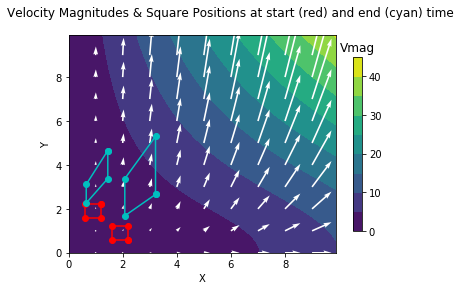

In [5]:
# Contour intervals for plotting velocity
cc = numpy.arange(0, 50, 5)
cl = numpy.arange(0, 50, 10)

# Plot velocity magnitudes and vectors
velfig = plt.figure(1)
velfig.suptitle("Velocity Magnitudes & Square Positions at start (red) and end (cyan) time")
c = plt.contourf(xx, yy, vmag[:, :], cc)
cbar = velfig.colorbar(c, shrink=0.8, ticks=cl)
cbar.ax.set_title("Vmag")
plt.quiver(xx[::10], yy[::10], vx[::10,::10], vy[::10,::10], color='w', scale=30, scale_units='inches')
plt.xlabel("X")
plt.ylabel("Y")

# Plot square positions at time t=0.
plt.plot(ptrackx1[:, 0], ptracky1[:, 0], 'ro', markerfacecolor='r')
plt.plot(ptrackx2[:, 0], ptracky2[:, 0], 'ro', markerfacecolor='r')
plt.plot(ptrackx1[:,0], ptracky1[:,0], 'r-')
plt.plot(ptrackx2[:,0], ptracky2[:,0], 'r-')

# Plot square positions at end time
plt.plot(ptrackx1[:, nt-1], ptracky1[:, nt-1], 'co', markerfacecolor='c')
plt.plot(ptrackx2[:, nt-1], ptracky2[:, nt-1], 'co', markerfacecolor='c')
plt.plot(ptrackx1[:,nt-1], ptracky1[:,nt-1], 'c-')
plt.plot(ptrackx2[:,nt-1], ptracky2[:,nt-1], 'c-')


Step 4: Calculate spatial derivatives of displacement in a time step dt and plot

<Figure size 432x288 with 0 Axes>

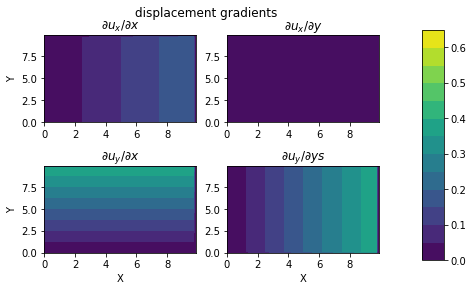

In [6]:
# Initialise arrays for displacement derivatives
duxdx = numpy.zeros((ny,nx))
duydy = duxdx.copy()
duxdy = duxdx.copy() 
duydx = duxdx.copy() 

# Compute velocity derivatives using central differences
# Multiply with time step dt to obtain displacement derivatives
# Note that without boundary conditions, no values on grid edges can be obtained 
# That is, initial (zero) values remain for the points with ix=0, ix=nx-1, iy=0, iy=ny-1
for iy in range(1,ny-2,1):
    for ix in range(1,nx-2,1):
       duxdx[iy,ix]=dt*(vx[iy,ix+1]-vx[iy,ix-1])/dx
       duydx[iy,ix]=dt*(vy[iy,ix+1]-vy[iy,ix-1])/dx
       duydy[iy,ix]=dt*(vy[iy+1,ix]-vy[iy-1,ix])/dy
       duxdy[iy,ix]=dt*(vx[iy+1,ix]-vx[iy-1,ix])/dy
        

# same colour scale for gradients, strain components, divergence and curl
ccderiv = numpy.arange(0, 0.7, 0.05)

# Plot displacement gradients
derivfig = plt.figure(2)
derivfig, axderiv = plt.subplots(2,2)
derivfig.suptitle("displacement gradients")
dxx = axderiv[0,0].contourf(xx, yy, duxdx[:, :],ccderiv)
axderiv[0,0].set(ylabel='Y')
axderiv[0,0].set_title('$\partial u_x/\partial x$')
dyx = axderiv[1,0].contourf(xx, yy, duydx[:, :],ccderiv)
axderiv[1,0].set(xlabel='X', ylabel='Y')
axderiv[1,0].set_title('$\partial u_y/\partial x$')
dxy = axderiv[0,1].contourf(xx, yy, duxdy[:, :],ccderiv)
axderiv[0,1].set_title('$\partial u_x/\partial y$')
dyy = axderiv[1,1].contourf(xx, yy, duydy[:, :],ccderiv)
axderiv[1,1].set(xlabel='X')
axderiv[1,1].set_title('$\partial u_y/\partial ys$')

#adjust spacing
derivfig.subplots_adjust(hspace=0.5)
#set global colorbar
cb_ax = derivfig.add_axes([1.0, 0.1, 0.05, 0.8])
cbar = derivfig.colorbar(dyy, cax=cb_ax)

Step 5: Calculate and plot strain tensor components

<Figure size 432x288 with 0 Axes>

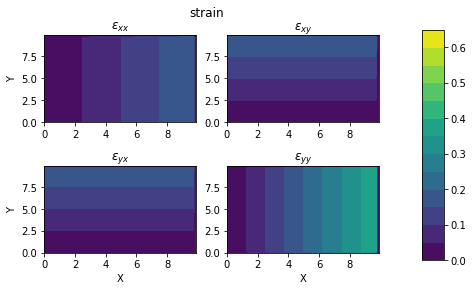

In [7]:
# initialise strain components, noting that eyx=exy
exx = numpy.zeros((ny,nx))
eyy = exx.copy() 
exy = exx.copy() 

# Calculate infinitesimal strain tensor components from velocity derivatives times time step
# At grid edges, where derivatives are not defined, strain will also be undefined (value=0)
exx = duxdx 
eyy = duydy
exy = numpy.multiply(numpy.add(duydx,duxdy),0.5)

# Plot strain tensor components
strainfig = plt.figure(3)
strainfig, axstrain = plt.subplots(2,2)
strainfig.suptitle("strain")
cxx = axstrain[0,0].contourf(xx, yy, exx[:, :],ccderiv)
axstrain[0,0].set(ylabel='Y')
axstrain[0,0].set_title('$\epsilon _{xx}$')
cyx = axstrain[1,0].contourf(xx, yy, exy[:, :],ccderiv)
axstrain[1,0].set(xlabel='X', ylabel='Y')
axstrain[1,0].set_title('$\epsilon _{yx}$')
cxy = axstrain[0,1].contourf(xx, yy, exy[:, :],ccderiv)
axstrain[0,1].set_title('$\epsilon _{xy}$')
cyy = axstrain[1,1].contourf(xx, yy, eyy[:, :],ccderiv)
axstrain[1,1].set(xlabel='X')
axstrain[1,1].set_title('$\epsilon _{yy}$')

#adjust spacing
strainfig.subplots_adjust(hspace=0.5)
#set global colorbar
cb_ax = strainfig.add_axes([1.0, 0.1, 0.05, 0.8])
cbar = strainfig.colorbar(cyy, cax=cb_ax)

Step 6: Calculate and plot divergence and magnitude of the curl for this displacement field

<Figure size 432x288 with 0 Axes>

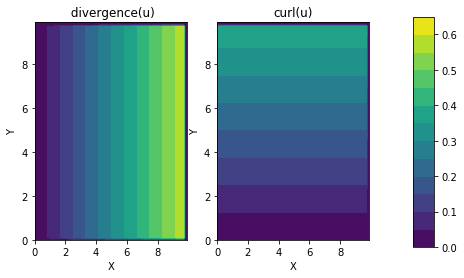

In [8]:
# Initialise arrays for divergence and curl of displacement
divu = numpy.zeros((ny,nx)) 
curlu = numpy.zeros((ny,nx))

# Calculate the fields of divergence of displacement and curl of displacement
divu=numpy.add(duxdx,duydy)
curlu=numpy.subtract(duydx,duxdy)

# Plot divergence and curl
divcurlfig = plt.figure(4)
divcurlfig, [ax1, ax2] = plt.subplots(1,2)
#divcurlfig.suptitle("Divergence and curl")
c1 = ax1.contourf(xx, yy, divu,ccderiv)
c2 = ax2.contourf(xx, yy, curlu,ccderiv)
#cbar = ax1.colorbar(c1,shrink=0.8)
ax1.set(xlabel='X', ylabel='Y')
ax1.set_title(' divergence(u)')
ax2.set(xlabel='X', ylabel='Y')
ax2.set_title('curl(u)')

#adjust spacing
divcurlfig.subplots_adjust(hspace=0.5)
#set global colorbar
cb_ax = divcurlfig.add_axes([1.0, 0.1, 0.05, 0.8])
cbar = divcurlfig.colorbar(c1, cax=cb_ax)

You could try yourself:
* Understand how strain tensor components, divergence and curl relate to the deformation of the two squares
* Different positions of the squares/other shapes
* A different velocity field